# Assignment 1 - Machine Learning, Decision Trees
### By: Sourita Nag and Sarah Ruckman

## Question 1
## Part A: Madelon

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from matplotlib import pyplot as plt

In [2]:
#Train features
madelon_train_data = open("C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Madelon/madelon_train.data", "r")
data_train = madelon_train_data.read()
data_train

chunks = data_train.strip().split('\n')
len(chunks)
train_features = []
for chunk in chunks:
    
    numbers = [int(num) for num in chunk.split()]
    
    # Add the list of numbers to the matrix
    train_features.append(numbers)
np.shape(train_features)

np.sum(train_features) #check
np.shape(train_features)

#Train labels
madelon_train_labels = open("C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Madelon/madelon_train.labels", "r")
labels_train = madelon_train_labels.read()
labels_train

chunks = labels_train.strip().split('\n')
len(chunks)
train_labels = []
for chunk in chunks:
    
    numbers = [int(num) for num in chunk.split()]
    
    # Add the list of numbers to the matrix
    train_labels.append(numbers)
np.shape(train_labels)

np.sum(train_labels) #check
np.shape(train_labels)

#Test features
madelon_test_data = open("C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Madelon/madelon_valid.data", "r")
data_test = madelon_test_data.read()
data_test

chunks = data_test.strip().split('\n')
len(chunks)
test_features = []

for chunk in chunks:
    
    numbers = [int(num) for num in chunk.split()]
    
    # Add the list of numbers to the matrix
    test_features.append(numbers)
np.shape(test_features)

np.sum(test_features) #check
np.shape(test_features)

#Test labels
madelon_test_labels = open("C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Madelon/madelon_valid.labels", "r")
labels_test = madelon_test_labels.read()
labels_test

chunks = labels_test.strip().split('\n')
len(chunks)
test_labels = []

for chunk in chunks:
    
    numbers = [int(num) for num in chunk.split()]
    
    # Add the list of numbers to the matrix
    test_labels.append(numbers)
np.shape(test_labels)

np.sum(test_labels) #check
np.shape(test_labels)

#Our data
#train_features
#train_labels
#test_features
#test_labels

(600, 1)

In [3]:
missclass_train = []
missclass_test = []
for depth in range(1,13):
    
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    clf = clf.fit(train_features,train_labels)
    Labels_pred_train = clf.predict(train_features)
    Labels_pred_test = clf.predict(test_features)
    misc_error_train = 1 - metrics.accuracy_score(train_labels, Labels_pred_train)
    missclass_train.append(misc_error_train)
    misc_error_test = 1 - metrics.accuracy_score(test_labels, Labels_pred_test)
    missclass_test.append(misc_error_test)



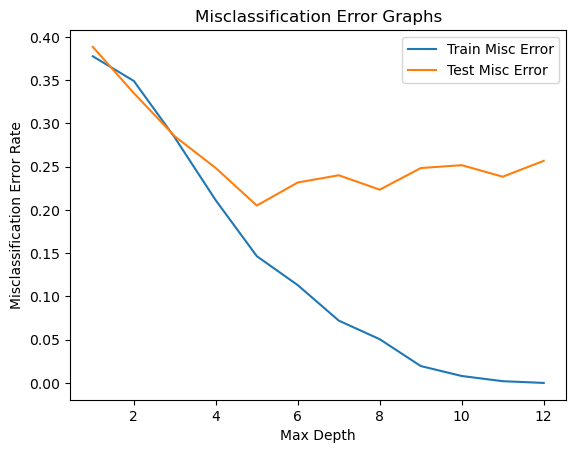

In [4]:
plt.title('Misclassification Error Graphs')
plt.plot([i for i in range(1,13)],missclass_train,label = 'Train Misc Error')
plt.plot([i for i in range(1,13)],missclass_test,label = 'Test Misc Error')
plt.xlabel('Max Depth')
plt.ylabel('Misclassification Error Rate')
plt.legend()
plt.show()

In [5]:
#Creating a dataframe for the errors
v = [val for val in range(1,13)]
data = pd.DataFrame({'Max_Depths' : v,'Misclassification Error for Train': missclass_train,'Misclassification Error for Test' : missclass_test})
data.set_index('Max_Depths', inplace=True)
data
styled_data = data.style.set_table_styles([{'selector': '', 'props': [('border', '2px solid black')]}])

# Display the styled DataFrame
#styled_data

In [6]:
# Minimum Test Error
data = {'Max_Depth': [5],
        'Misclassification Error for Test': [0.205000]}
# Create a DataFrame
table = pd.DataFrame(data)
table.set_index('Max_Depth', inplace=True)
table


,Misclassification Error for Test
Max_Depth,
5,0.205


### The minimum misclassification error rate for the test data set is 0.206667 with a maximum depth of 5. 

## Part B: Satimage

In [7]:
#Train features
X_train = open("C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Satimage/X.dat")
sat_X_train = X_train.read()
sat_X_train

sat_X_train = sat_X_train.strip().split('\n')
sat_X_train

X_train = []

for chunk in sat_X_train:
    numbers = [int(val) for val in chunk.split()]
    X_train.append(numbers)

np.shape(X_train)

#Train response
Y_train = open("C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Satimage/Y.dat")
sat_Y_train = Y_train.read()
sat_Y_train

sat_Y_train = sat_Y_train.strip().split('\n')
sat_Y_train

Y_train = []

for chunk in sat_Y_train:
    numbers = [int(val) for val in chunk.split()]
    Y_train.append(numbers)

np.shape(Y_train)

#Test features
X_test = open("C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Satimage/Xtest.dat")
sat_X_test = X_test.read()
sat_X_test

sat_X_test = sat_X_test.strip().split('\n')
sat_X_test

X_test = []

for chunk in sat_X_test:
    numbers = [int(val) for val in chunk.split()]
    X_test.append(numbers)

np.shape(X_test)

#Test response
Y_test = open("C:/Users/Sourita Nag/OneDrive/Documents/Fourth Semester/Satimage/Ytest.dat")
sat_Y_test = Y_test.read()
sat_Y_test

sat_Y_test = sat_Y_test.strip().split('\n')
sat_Y_test

Y_test = []

for chunk in sat_Y_test:
    numbers = [int(val) for val in chunk.split()]
    Y_test.append(numbers)

np.shape(Y_test)

#X_train
#X_test
#Y_train
#Y_test

(2000, 1)

In [8]:
missclass_train = []
missclass_test = []
for depth in range(1,13):
    
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    clf = clf.fit(X_train,Y_train)
    Y_pred_train = clf.predict(X_train)
    Y_pred_test = clf.predict(X_test)
    misc_error_train = 1 - metrics.accuracy_score(Y_train, Y_pred_train)
    missclass_train.append(misc_error_train)
    misc_error_test = 1 - metrics.accuracy_score(Y_test, Y_pred_test)
    missclass_test.append(misc_error_test)
    

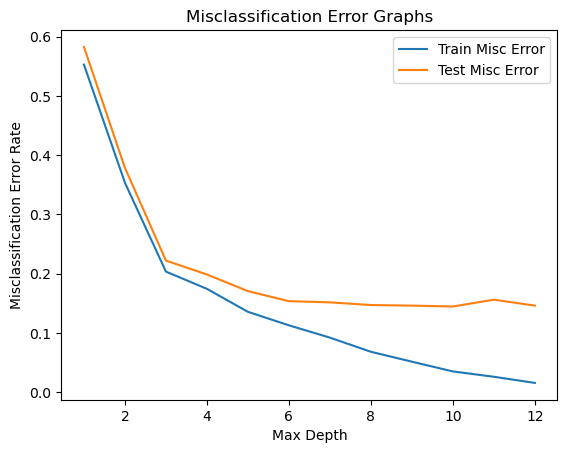

In [9]:
plt.title('Misclassification Error Graphs')
plt.plot([i for i in range(1,13)],missclass_train,label = 'Train Misc Error')
plt.plot([i for i in range(1,13)],missclass_test,label = 'Test Misc Error')
plt.xlabel('Max Depth')
plt.ylabel('Misclassification Error Rate')
plt.legend()
plt.show()

In [10]:
#Creating a dataframe for the errors
v = [val for val in range(1,13)]
data = pd.DataFrame({'Max_Depths' : v,'Misclassification Error for Train': missclass_train,'Misclassification Error for Test' : missclass_test})
data.set_index('Max_Depths', inplace=True)
data
styled_data = data.style.set_table_styles([{'selector': '', 'props': [('border', '2px solid black')]}])

# Display the styled DataFrame
#styled_data
#data
#data['Misclassification Error for Test'].min()

In [11]:
# Minimum Test Error
data = {'Max_Depth': [10],
        'Misclassification Error for Test': [0.1435]}
# Create a DataFrame
table = pd.DataFrame(data)
table.set_index('Max_Depth', inplace=True)
table

,Misclassification Error for Test
Max_Depth,
10,0.1435


### The minimum misclassification error rate for the test data set is 0.1435 with a maximum depth of 10.

## Part C: With sqrt(500) with Madelon Dataset

In [12]:
#Our data
#train_features
#train_labels
#test_features
#test_labels

n = int(np.ceil(np.sqrt(500)))
k_vals = [3, 10, 30, 100, 300]
#max_dep_val = 5

missc_train = []
missc_test = []

for k in k_vals:
    #rf_classifier = RandomForestClassifier(n_estimators=k, max_depth=max_dep_val,max_features = n)
    rf_classifier = RandomForestClassifier(n_estimators=k,max_features = n)
    rf_classifier.fit(train_features, train_labels)
    labels_pred_train = rf_classifier.predict(train_features)
    labels_pred_test = rf_classifier.predict(test_features)

    missc_error_train = 1 - accuracy_score(train_labels, labels_pred_train)
    missc_train.append(missc_error_train)
    missc_error_test = 1 - accuracy_score(test_labels, labels_pred_test)
    missc_test.append(missc_error_test)

C:\Users\Sourita Nag\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Sourita Nag\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Sourita Nag\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Sourita Nag\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

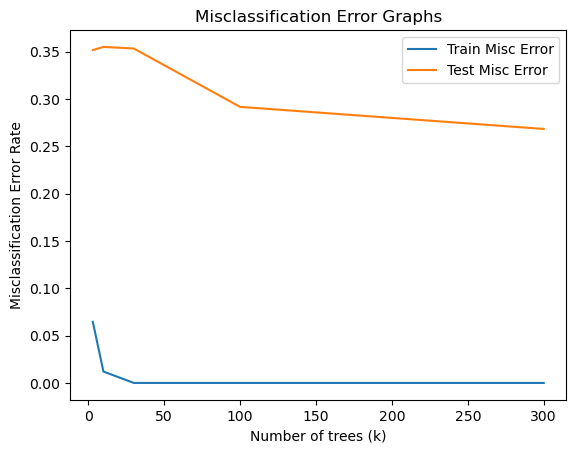

In [13]:
plt.title('Misclassification Error Graphs')
plt.plot([k for k in k_vals],missc_train,label = 'Train Misc Error')
plt.plot([k for k in k_vals],missc_test,label = 'Test Misc Error')
plt.xlabel('Number of trees (k)')
plt.ylabel('Misclassification Error Rate')
plt.legend()
plt.show()

In [14]:
#Creating a dataframe for the errors
v = [k for k in k_vals]
data = pd.DataFrame({'K_Values' : v,'Misclassification Error for Train': missc_train,'Misclassification Error for Test' : missc_test})
data.set_index('K_Values', inplace=True)
data
styled_data = data.style.set_table_styles([{'selector': '', 'props': [('border', '2px solid black')]}])

# Display the styled DataFrame
styled_data

,Misclassification Error for Train,Misclassification Error for Test
K_Values,,
3,0.064500,0.351667
10,0.012000,0.355000
30,0.000000,0.353333
100,0.000000,0.291667
300,0.000000,0.268333


## Part D: log(500) with Madelon dataset

In [15]:
# The same thing with log(500)

#Our data
#train_features
#train_labels
#test_features
#test_labels

n = int(np.ceil(np.log(500)))
k_vals = [3, 10, 30, 100, 300]
#max_dep_val = 5

missc_train = []
missc_test = []

for k in k_vals:
    rf_classifier = RandomForestClassifier(n_estimators=k,max_features = n)
    rf_classifier.fit(train_features, train_labels)
    labels_pred_train = rf_classifier.predict(train_features)
    labels_pred_test = rf_classifier.predict(test_features)

    missc_error_train = 1 - accuracy_score(train_labels, labels_pred_train)
    missc_train.append(missc_error_train)
    missc_error_test = 1 - accuracy_score(test_labels, labels_pred_test)
    missc_test.append(missc_error_test)

C:\Users\Sourita Nag\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Sourita Nag\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Sourita Nag\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Sourita Nag\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

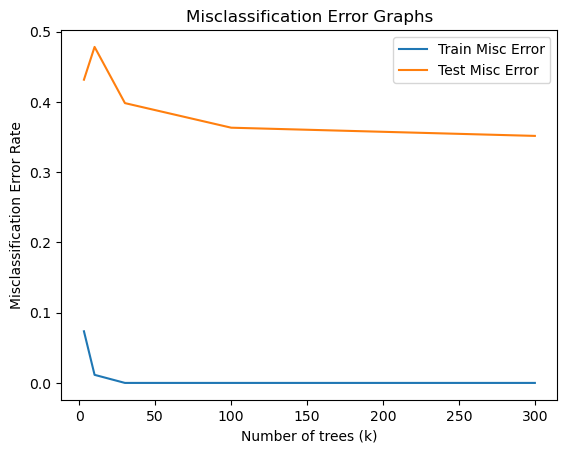

In [16]:
plt.title('Misclassification Error Graphs')
plt.plot([k for k in k_vals],missc_train,label = 'Train Misc Error')
plt.plot([k for k in k_vals],missc_test,label = 'Test Misc Error')
plt.xlabel('Number of trees (k)')
plt.ylabel('Misclassification Error Rate')
plt.legend()
plt.show()

In [17]:
#Creating a dataframe for the errors
v = [k for k in k_vals]
data = pd.DataFrame({'K_Values' : v,'Misclassification Error for Train': missc_train,'Misclassification Error for Test' : missc_test})
data.set_index('K_Values', inplace=True)
data
styled_data = data.style.set_table_styles([{'selector': '', 'props': [('border', '2px solid black')]}])

# Display the styled DataFrame
styled_data

,Misclassification Error for Train,Misclassification Error for Test
K_Values,,
3,0.073500,0.431667
10,0.011500,0.478333
30,0.000000,0.398333
100,0.000000,0.363333
300,0.000000,0.351667


## Part E: With n = 500

In [18]:
n = 500
k_vals = [3, 10, 30, 100, 300]
#max_dep_val = 5

missc_train = []
missc_test = []

for k in k_vals:
    rf_classifier = RandomForestClassifier(n_estimators=k,max_features = n)
    rf_classifier.fit(train_features, train_labels)
    labels_pred_train = rf_classifier.predict(train_features)
    labels_pred_test = rf_classifier.predict(test_features)

    missc_error_train = 1 - accuracy_score(train_labels, labels_pred_train)
    missc_train.append(missc_error_train)
    missc_error_test = 1 - accuracy_score(test_labels, labels_pred_test)
    missc_test.append(missc_error_test)
    


C:\Users\Sourita Nag\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Sourita Nag\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Sourita Nag\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Sourita Nag\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

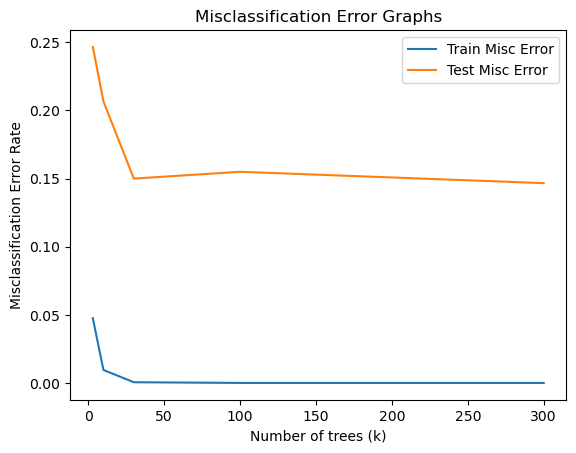

In [19]:
plt.title('Misclassification Error Graphs')
plt.plot([k for k in k_vals],missc_train,label = 'Train Misc Error')
plt.plot([k for k in k_vals],missc_test,label = 'Test Misc Error')
plt.xlabel('Number of trees (k)')
plt.ylabel('Misclassification Error Rate')
plt.legend()
plt.show()

In [20]:
#Creating a dataframe for the errors
v = [k for k in k_vals]
data = pd.DataFrame({'K_Values' : v,'Misclassification Error for Train': missc_train,'Misclassification Error for Test' : missc_test})
data.set_index('K_Values', inplace=True)
data
styled_data = data.style.set_table_styles([{'selector': '', 'props': [('border', '2px solid black')]}])

# Display the styled DataFrame
styled_data

,Misclassification Error for Train,Misclassification Error for Test
K_Values,,
3,0.047500,0.246667
10,0.009500,0.206667
30,0.000500,0.150000
100,0.000000,0.155000
300,0.000000,0.146667
